## Analysing and Solving the Kaggle Titanic Dataset

In [231]:
# Get the Data and see the dataset

import os
path=os.getcwd()
print(path)

c:\Public\ML\StrangerThings\Kaggle_Titanic


In [232]:
import matplotlib.pyplot as plt
import pandas as pd
filepath=[]
for file in os.listdir(path):
    if 'csv' in file:filepath.append(path+"\\"+file)
print(filepath)        

['c:\\Public\\ML\\StrangerThings\\Kaggle_Titanic\\gender_submission.csv', 'c:\\Public\\ML\\StrangerThings\\Kaggle_Titanic\\Submission_Voting.csv', 'c:\\Public\\ML\\StrangerThings\\Kaggle_Titanic\\test.csv', 'c:\\Public\\ML\\StrangerThings\\Kaggle_Titanic\\train.csv']


In [233]:
for path in filepath:
    if "train" in path:
        df_train=pd.read_csv(path)
    if "test" in path:
        df_test=pd.read_csv(path)
    if "gender" in path:
        gender_sub=pd.read_csv(path)

In [234]:
df_train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [235]:
(df_train.size, df_train.shape)

(10692, (891, 12))

In [236]:
df_test.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [237]:
df_test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

### Ideas To Start with 
+ Check what features are useful and make sense to predict survived or not
+ Break down into Sex and Pclass, and age that might give a basic idea of the dataset patterns
    + After breaking down the data, lets clean it based on NaN's present
    + As we take out some of the data counts, we see Age and Embarked probably have "NaN"s .
    + Just using the features, Pclass, Sex , they do not have any NaNs.
+ Considering the Whole Dataset
    + Take Pred = Survived = [0,1]
    + Use Features as "Pclass" and "Sex" and predict and check the accuracy, we will go from there
    + Use just these two fetures, break into training and validation set
    + Test the training and validation accuracy
    + Start adding more features and see how that makes the prediction accuracy better
+ Get a Basic Logistic Regression as a step-1 to predict the test set accuracy 

In [238]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

output_notebook()

Loading BokehJS ...

In [239]:
import numpy as np
df_train_filt1=df_train[['PassengerId','Survived','Pclass','Sex','Age','Embarked']]
print("Total records = ", df_train_filt1.shape[0])
print("How many survivied as below", "\n", df_train_filt1[df_train_filt1['Survived']==1].count())
print("How many persished as below", "\n", df_train_filt1[df_train_filt1['Survived']==0].count())

# As a whole population Check how many survived and perished
p=figure(x_range=["Total Passengers", "Survived", "Perished"], plot_height=500, title="Total Survival guide")
p.vbar(x=["Total Passengers", "Survived", "Perished"], top=[df_train_filt1.shape[0], \
                                                           df_train_filt1[df_train_filt1['Survived']==1].shape[0], 
                                                           df_train_filt1[df_train_filt1['Survived']==0].shape[0]], width=0.7)

#set some properties to make the plot look better
p.xgrid.grid_line_color="Blue"
p.y_range.start=0.0

show(p)

Total records =  891
How many survivied as below 
 PassengerId    342
Survived       342
Pclass         342
Sex            342
Age            290
Embarked       340
dtype: int64
How many persished as below 
 PassengerId    549
Survived       549
Pclass         549
Sex            549
Age            424
Embarked       549
dtype: int64


In [240]:
s_male_count=df_train_filt1[df_train_filt1["Survived"]==1][df_train_filt1["Sex"]=='male'].shape[0]
s_female_count=df_train_filt1[df_train_filt1['Survived']==1][df_train_filt1['Sex']=='female'].shape[0]
p_male_count=df_train_filt1[df_train_filt1['Survived']==0][df_train_filt1['Sex']=='male'].shape[0]
p_female_count=df_train_filt1[df_train_filt1['Survived']==0][df_train_filt1['Sex']=='female'].shape[0]


x_range_= [val1+"_"+val2 for val2 in list(df_train_filt1['Sex'].unique()) for val1 in ['Survived', 'Perished']]
p=figure(x_range=x_range_, plot_height=300, title="Survival among Sex")
p.vbar(x=x_range_, top=[s_male_count,p_male_count,s_female_count,p_female_count], width=0.7)

# Set some properties to make the plot look better
p.xgrid.grid_line_color=None
p.y_range.start=0.0

show(p)

C:\Users\sananand\AppData\Local\Continuum\miniconda3\envs\tensorflowpy36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\sananand\AppData\Local\Continuum\miniconda3\envs\tensorflowpy36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\sananand\AppData\Local\Continuum\miniconda3\envs\tensorflowpy36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sananand\AppData\Local\Continuum\miniconda3\envs\tensorflowpy36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


### Insights and Making sense of the data
+ The above curve suggests that there are a large % of men who perished and quite a few % of women who survived, This does not build any relation but still, let's analyze it further with "Age" and "Pclass" into the picture here
+ For males who perished, most of the Age range lies between 20-45, let's get a visual Bar graph for that
+ For females who perished, most of the Age range lies between 20-40.
+ https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas

C:\Users\sananand\AppData\Local\Continuum\miniconda3\envs\tensorflowpy36\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\sananand\AppData\Local\Continuum\miniconda3\envs\tensorflowpy36\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
C:\Users\sananand\AppData\Local\Continuum\miniconda3\envs\tensorflowpy36\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\sananand\AppData\Local\Continuum\miniconda3\envs\tensorflowpy36\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


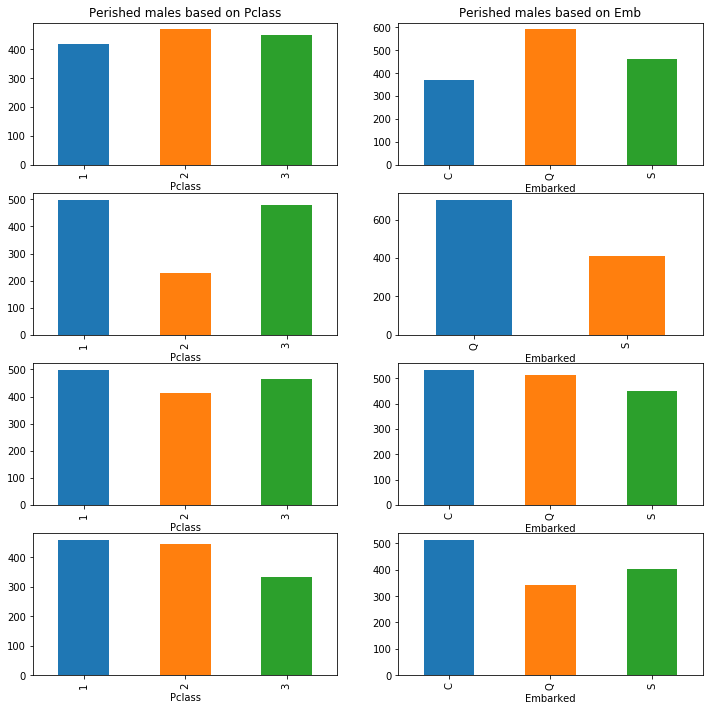

In [246]:
from bokeh.models import HoverTool, BoxSelectTool

hover = HoverTool(
                    tooltips=[
                        ("index", "$index"),
                        ("(x,y)","($x, $y)")
                    ])
#TOOLS=[HoverTool()]
p1=figure(plot_width=1000, plot_height=800, title="Perished Vs Survived Male with Age", tools=[hover])


s_male_age_df = df_train_filt1[df_train_filt1["Survived"]==1][df_train_filt1["Sex"]=='male'].dropna()
p_male_age_df = df_train_filt1[df_train_filt1["Survived"]==0][df_train_filt1["Sex"]=='male'].dropna()
s_female_age_df = df_train_filt1[df_train_filt1["Survived"]==1][df_train_filt1["Sex"]=='female'].dropna()
p_female_age_df = df_train_filt1[df_train_filt1["Survived"]==0][df_train_filt1["Sex"]=='female'].dropna()


# Get Number of Perished male and females age rangses
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12,12))
p_male_age_df[(p_male_age_df.Age>=20)&(p_male_age_df.Age<=40)].groupby('Pclass')['PassengerId'].mean().plot(kind='bar',ax=ax[0,0], title="Perished males based on Pclass")
p_male_age_df[(p_male_age_df.Age>=20)&(p_male_age_df.Age<=40)].groupby('Embarked')['PassengerId'].mean().plot(kind='bar',ax=ax[0,1], title="Perished males based on Emb")
p_female_age_df[(p_female_age_df.Age>=20)&(p_female_age_df.Age<=40)].groupby('Pclass')['PassengerId'].mean().plot(kind='bar',ax=ax[1,0], title="")
p_female_age_df[(p_female_age_df.Age>=20)&(p_female_age_df.Age<=40)].groupby('Embarked')['PassengerId'].mean().plot(kind='bar',ax=ax[1,1], title="")

# Get Number of Survived males and females age ranges
s_male_age_df[(s_male_age_df.Age>=20)&(s_male_age_df.Age<=40)].groupby('Pclass')['PassengerId'].mean().plot(kind='bar',ax=ax[2,0], title="")
s_male_age_df[(s_male_age_df.Age>=20)&(s_male_age_df.Age<=40)].groupby('Embarked')['PassengerId'].mean().plot(kind='bar',ax=ax[2,1], title="")
s_female_age_df[(s_female_age_df.Age>=20)&(s_female_age_df.Age<=40)].groupby('Pclass')['PassengerId'].mean().plot(kind='bar',ax=ax[3,0], title="")
s_female_age_df[(s_female_age_df.Age>=20)&(s_female_age_df.Age<=40)].groupby('Embarked')['PassengerId'].mean().plot(kind='bar',ax=ax[3,1], title="")


p1.line(s_male_age_df['PassengerId'], s_male_age_df['Age'],color='blueviolet',line_width=1)
p1.line(p_male_age_df['PassengerId'], p_male_age_df['Age'],color='red',line_width=1)
show(p1)


#### More Insights 
+ For Male who perished, we see the "Pclass" does not make any difference, but Embarkment sure does.
+ For Female who perished, we see both make a lot of difference, it also seems no one who embarked from "C" perished, which is a significant find

In [206]:
p2=figure(plot_width=1000, plot_height=800, title="Perished Vs Survived FeMale with Age", tools=[hover])
p2.line(s_female_age_df['PassengerId'], s_female_age_df['Age'],color='blueviolet',line_width=1)
p2.line(p_female_age_df['PassengerId'], p_female_age_df['Age'],color='red',line_width=1)
show(p2)

### Prediction
+ Now we break down the Training set into Training and validation sets 
+ Use Logistic regression as the Model to predict, and check the Training and validation accuracy 
+ **Never delete NaN's, fill them up and use the data**
+ Use the barebone features, "Sex", "Age", "Embarked", "Pclass" , which is a very small set of feautes and does not use any feauture engineering
+ Indexing in pandas: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
+ Handling missing data: https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html
+ https://www.google.com/search?ei=_HUNW6mCIpO90PEPg4WHkAs&q=train+and+test+split+in+python&oq=train+and+spli&gs_l=psy-ab.3.1.0i22i30k1l10.12314.20753.0.23985.19.16.3.0.0.0.128.1502.7j8.16.0..2..0...1.1.64.psy-ab..0.19.1654.6..0j35i39k1j0i131i67k1j0i67k1j0i131k1j0i20i264k1.92.Nqkw2Njl6BU

In [207]:
# Break into Validation set, drop the survived column and also need to make sure there are no NaN's
df_train.head(10)
df_train_filt2=df_train[['PassengerId','Survived','Pclass','Sex', 'Age','Fare','Embarked']]
df_train_filt2.head(10)
print(df_train_filt2.count()) # There are a lot of Age's that are NA, let's not remove them but fill them up with the mean

# Filling up the NaN for embarked
Emb_classes=list(df_train['Embarked'].unique())[:3]
ch=np.random.choice([i for i in range(len(Emb_classes))])
listofIds=list(df_train_filt2[df_train_filt2['Embarked'].isna()==True].index)
print(listofIds)
for val in listofIds:df_train_filt2.loc[val,'Embarked']=Emb_classes[ch]

print(df_train_filt2.count())
#df_train_filt2[df_train_filt2['Embarked'].isna()==True].fillna(Emb_classes[ch])


PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            714
Fare           891
Embarked       889
dtype: int64
[61, 829]
PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            714
Fare           891
Embarked       891
dtype: int64


C:\Users\sananand\AppData\Local\Continuum\miniconda3\envs\tensorflowpy36\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


177


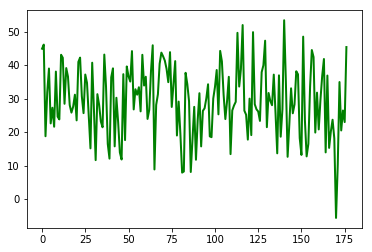

C:\Users\sananand\AppData\Local\Continuum\miniconda3\envs\tensorflowpy36\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            891
Fare           891
Embarked       891
dtype: int64


In [208]:
# Now to fill up the NA values for Ages
mean_age=df_train_filt2['Age'].mean()
listofAgeind_=list(df_train_filt2[df_train_filt2['Age'].isna()==True].index)
print(len(listofAgeind_))
list_of_ages=np.random.normal(mean_age, 10, len(listofAgeind_))

plt.plot(list_of_ages, linewidth=2, color='g', label='Age')
plt.show()
for (idx,age) in zip(listofAgeind_,list_of_ages):df_train_filt2.loc[idx, 'Age']=age
print(df_train_filt2.count())

### We would need to get the Test set in the same order here as the training set, with the same set of columns to make it work for the model

In [209]:
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [210]:
df_train_filt2.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,male,22.000000,7.2500,S
1,2,1,1,female,38.000000,71.2833,C
2,3,1,3,female,26.000000,7.9250,S
3,4,1,1,female,35.000000,53.1000,S
4,5,0,3,male,35.000000,8.0500,S
5,6,0,3,male,44.901398,8.4583,Q
6,7,0,1,male,54.000000,51.8625,S
7,8,0,3,male,2.000000,21.0750,S
8,9,1,3,female,27.000000,11.1333,S
9,10,1,2,female,14.000000,30.0708,C


In [211]:
# Break into test and validation sets 
from sklearn.model_selection import train_test_split

#clear out the columns that are not required here
df_test_filt1=df_test[['PassengerId','Pclass','Sex','Age','Fare','Embarked']]
df_test_filt1.count()

PassengerId    418
Pclass         418
Sex            418
Age            332
Fare           417
Embarked       418
dtype: int64

In [212]:
#Filling up the NaN for Fare and Age for matching up the data
mean_fare=df_test_filt1['Fare'].mean()
fare_idx=df_test_filt1[df_test_filt1['Fare'].isna()==True].index
df_test_filt1.loc[fare_idx,'Fare']=mean_fare
df_test_filt1.count()

C:\Users\sananand\AppData\Local\Continuum\miniconda3\envs\tensorflowpy36\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


PassengerId    418
Pclass         418
Sex            418
Age            332
Fare           418
Embarked       418
dtype: int64

86


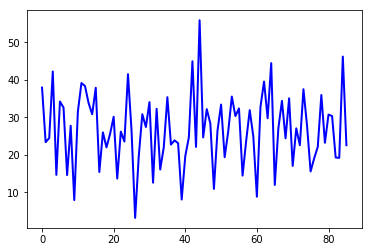

C:\Users\sananand\AppData\Local\Continuum\miniconda3\envs\tensorflowpy36\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


PassengerId    418
Pclass         418
Sex            418
Age            418
Fare           418
Embarked       418
dtype: int64


In [213]:
# Filling up the NaN for Ages for matching up the data
# Now to fill up the NA values for Ages
mean_age1=df_test_filt1['Age'].mean()
listofAgeind1_=list(df_test_filt1[df_test_filt1['Age'].isna()==True].index)
print(len(listofAgeind1_))
list_of_ages1=np.random.normal(mean_age1, 10, len(listofAgeind1_))

plt.plot(list_of_ages1, linewidth=2, color='b', label='Age')
plt.show()
for (idx,age) in zip(listofAgeind1_,list_of_ages1):df_test_filt1.loc[idx, 'Age']=age
print(df_test_filt1.count())

### Breaking down the Age and Fare's into classes before training

In [214]:
df_train_filt2['Fareclass']=pd.qcut(df_train_filt2['Fare'], 4, labels=[1,2,3,4])
df_train_filt2['Ageclass']=pd.qcut(df_train_filt2['Age'], 5, labels=[1,2,3,4,5])
df_test_filt1['Fareclass']=pd.qcut(df_test_filt1['Fare'], 4, labels=[1,2,3,4])
df_test_filt1['Ageclass']=pd.qcut(df_test_filt1['Age'], 5, labels=[1,2,3,4,5])

C:\Users\sananand\AppData\Local\Continuum\miniconda3\envs\tensorflowpy36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sananand\AppData\Local\Continuum\miniconda3\envs\tensorflowpy36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sananand\AppData\Local\Continuum\miniconda3\envs\tensorflowpy36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a

In [215]:
df_train_filt2.drop(['Fare','Age'], axis=1, inplace=True)
df_test_filt1.drop(['Fare','Age'], axis=1, inplace=True)

C:\Users\sananand\AppData\Local\Continuum\miniconda3\envs\tensorflowpy36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sananand\AppData\Local\Continuum\miniconda3\envs\tensorflowpy36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Train the Models Now

In [216]:
# Get the encoding done to get rid of string columns that you cannot train
df_train_filt2=pd.get_dummies(df_train_filt2, columns=['Sex','Embarked','Pclass','Ageclass','Fareclass'], drop_first=True)
df_test_filt1=pd.get_dummies(df_test_filt1, columns=['Sex','Embarked','Pclass','Ageclass','Fareclass'], drop_first=True)

In [217]:
y=df_train_filt2['Survived']
X=df_train_filt2.iloc[:,2:] #taking all except the 1st two columns
Passenger_id = df_test_filt1['PassengerId']
df_test_filt1.drop(labels=['PassengerId'], inplace=True, axis=1)

In [218]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.20, random_state=1)

In [219]:
X.head(15)

,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Ageclass_2,Ageclass_3,Ageclass_4,Ageclass_5,Fareclass_2,Fareclass_3,Fareclass_4
0,1,0,1,0,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,1,0,1,0,1,0,0,1,0,0
3,0,0,1,0,0,0,0,1,0,0,0,1
4,1,0,1,0,1,0,0,1,0,1,0,0
5,1,1,0,0,1,0,0,0,1,1,0,0
6,1,0,1,0,0,0,0,0,1,0,0,1
7,1,0,1,0,1,0,0,0,0,0,1,0
8,0,0,1,0,1,0,1,0,0,1,0,0
9,0,0,0,1,0,0,0,0,0,0,1,0


In [220]:
df_train_filt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Sex_male       891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
Pclass_2       891 non-null uint8
Pclass_3       891 non-null uint8
Ageclass_2     891 non-null uint8
Ageclass_3     891 non-null uint8
Ageclass_4     891 non-null uint8
Ageclass_5     891 non-null uint8
Fareclass_2    891 non-null uint8
Fareclass_3    891 non-null uint8
Fareclass_4    891 non-null uint8
dtypes: int64(2), uint8(12)
memory usage: 24.4 KB


In [221]:
df_test_filt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
Sex_male       418 non-null uint8
Embarked_Q     418 non-null uint8
Embarked_S     418 non-null uint8
Pclass_2       418 non-null uint8
Pclass_3       418 non-null uint8
Ageclass_2     418 non-null uint8
Ageclass_3     418 non-null uint8
Ageclass_4     418 non-null uint8
Ageclass_5     418 non-null uint8
Fareclass_2    418 non-null uint8
Fareclass_3    418 non-null uint8
Fareclass_4    418 non-null uint8
dtypes: uint8(12)
memory usage: 5.0 KB


## Predictions with Different Classification Algorithms

### 1. Logistic Regression


In [222]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, precision_score, classification_report
lgmodel = LogisticRegression(max_iter=100, C=1e5)
lgmodel.fit(X_train, y_train)
ypred=lgmodel.predict(X_test)
print(lgmodel.score(X_train, y_train))
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test, ypred))

0.8132022471910112
[[94 12]
 [31 42]]
             precision    recall  f1-score   support

          0       0.75      0.89      0.81       106
          1       0.78      0.58      0.66        73

avg / total       0.76      0.76      0.75       179



### 2. SVM

In [223]:
from sklearn.svm import SVC
modelsvc=SVC(probability=True, gamma='auto')
modelsvc.fit(X_train, y_train)
ypred=modelsvc.predict(X_test)
print(modelsvc.score(X_train, y_train))
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))

0.7893258426966292
[[90 16]
 [24 49]]
             precision    recall  f1-score   support

          0       0.79      0.85      0.82       106
          1       0.75      0.67      0.71        73

avg / total       0.77      0.78      0.77       179



### 3. Decision Tree

In [224]:
from sklearn.tree import DecisionTreeClassifier
dtmodel=DecisionTreeClassifier()
dtmodel.fit(X_train, y_train)
ypred=dtmodel.predict(X_test)
print(dtmodel.score(X_train, y_train))
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))

0.8637640449438202
[[95 11]
 [35 38]]
             precision    recall  f1-score   support

          0       0.73      0.90      0.81       106
          1       0.78      0.52      0.62        73

avg / total       0.75      0.74      0.73       179



### 4. Random Forest

In [225]:
from sklearn.ensemble import RandomForestClassifier
rfmodel=RandomForestClassifier(n_estimators=60)
rfmodel.fit(X_train, y_train)
ypred=rfmodel.predict(X_test)
print(rfmodel.score(X_train, y_train))
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))

0.8637640449438202
[[95 11]
 [33 40]]
             precision    recall  f1-score   support

          0       0.74      0.90      0.81       106
          1       0.78      0.55      0.65        73

avg / total       0.76      0.75      0.74       179



### 5. Gradient Boosting

In [226]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(n_estimators=100)
gbm.fit(X_train, y_train)
ypred=gbm.predict(X_test)
print(gbm.score(X_train, y_train))
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))

0.8455056179775281
[[96 10]
 [32 41]]
             precision    recall  f1-score   support

          0       0.75      0.91      0.82       106
          1       0.80      0.56      0.66        73

avg / total       0.77      0.77      0.76       179



### 6. Voting Classifier

In [228]:
from sklearn.ensemble import VotingClassifier
votingmodel=VotingClassifier(estimators=[('Logis',lgmodel), ('svc',modelsvc), ('dt',dtmodel), ('rf',rfmodel), ('gbm',gbm)], voting='soft', n_jobs=5)
voting=votingmodel.fit(X_train, y_train)


In [229]:
predtest=voting.predict(df_test_filt1)
print(confusion_matrix(gender_sub.Survived, predtest))
print(classification_report(gender_sub.Survived, predtest))

[[256  10]
 [ 30 122]]
             precision    recall  f1-score   support

          0       0.90      0.96      0.93       266
          1       0.92      0.80      0.86       152

avg / total       0.91      0.90      0.90       418



### Final Submission Prediction

In [230]:
# Generating Submission File
sub_voting = pd.DataFrame({'PassengerId':Passenger_id, 'Survived':predtest})
sub_voting.to_csv('Submission_Voting.csv', index=False)